## La función de densidad Gaussiana (Distribución normal)

La función de densidad Gaussiana es la función de densidad más utilizada en el análisis de datos y el reconocimiento de patrones, pues muchos fenómenos aleatorios naturales (como por ejemplo el peso de las personas en una cierta edad, características físicas en animales y plantas, etc.) se modelan de forma satisfactoria con una función de densidad Gaussiana.

La función de densidad Gaussiana es un modelo con dos parámetros: media $\mu$ y varianza $\sigma^2$. Para el caso de una dimensión en la que el codominio está dado por $x\in\mathbb{R}$, se tiene que una función de densidad de probabilidad está dada por: 

\begin{equation}
f\left(x\right)=\mathcal{N}\left(x|\mu,\sigma\right)=\frac{1}{\sqrt{2\pi\sigma^{2}}}\exp\left(-\frac{1}{2\sigma^{2}}\left(x-\mu\right)^{2}\right),
\end{equation}

lo cual expresa la probabilidad de que el valor $X=x$ haya sido generado por un modelo Gaussiano con parámetros $\mu$ y $\sigma^2$. El coeficiente $\frac{1}{\sqrt{2\pi\sigma^{2}}}$ normaliza la función de densidad y garantiza el área bajo la curva sea de 1: 

\begin{equation}
\int_{-\infty}^{\infty}\mathcal{N}\left(x|\mu,\sigma\right)\textrm{d}x=1.
\end{equation}


El valor $x$ que maximiza la función de densidad de probabilidad Gaussiana, coincide con la **media**, **mediana** y **moda**, como ilustra la la siguente figura

![](https://drive.google.com/uc?export=view&id=1lHekBg7C-cdYT8vB0egQ5w8UiVjAPjHi)

###Regla Empírica 

* $\mu+\sigma$ contiene aproximadamente *68%* de las observaciones.

* $\mu+2\sigma$ contiene aproximadamente *95%* de las observaciones.

* $\mu+3\sigma$ contiene aproximadamente *99%* de las observaciones.


## El teorema del límite central

Ya anteriormente definimos $\overline{x}=\frac{x_{1}+x_{2}+\ldots+x_{n}}{n}$ como la **media muestral** de un conjunto de $n$ observaciones de la variable aleatoria $X$ con $E(X)=\mu$ y $V(X)=\sigma^2$.

Si obtenemos, por ejemplo, $r=100000$
muestras, y calculamos la media muestral de cada muestra, tendríamos:

\begin{equation}
X_{1},X_{2},\ldots X_{r}
\end{equation}

\begin{equation}
\overline{x}_{1},\overline{x}_{2},\ldots\overline{x}_{r},
\end{equation}

lo cual nos permite estudiar la distribución muestral de la media muestral
$\overline{x}$, que resulta de mucha utilidad para conocer que tan
cerca tiende a estar una media estadística $\overline{x}_{j}$ de la media de
la población $\mu$. Esto nos lleva a la pregunta: ¿Cuál es el valor
esperado de las medias estadísticas?


El teorema del límite central establece que las **medias de las muestras**  $X_{1},X_{2},\ldots,X_{r}$, dadas por $\overline{x}_{1},\overline{x}_{2},\ldots\overline{x}_{r}$, **siguen una distribución normal**, con media $\mu_{\overline{x}}=\mu$, y varianza $\sigma_{\overline{x}}^{2}=\frac{\sigma^{2}}{n}$, a medida que la cantidad de observaciones por muestra n $\rightarrow\infty$ (puede ver la demostración [aquí](https://newonlinecourses.science.psu.edu/stat414/node/174/) ). Esto se cumple independientemente de la distribución subyacente de las muestras. Como recordamos, la distribución Gaussiana se ilustra en la siguiente figura.

![](https://drive.google.com/uc?export=view&id=1TsDcWkDEitOmtpDYY81IZ0P_K1eqluOP)

De la figura anterior podemos extraer que, para una distribución Gaussiana:

\begin{aligned}p\left\{ \mu-1\sigma\leq\overline{x}\leq\mu+1\sigma\right\}  & \approx0.6827\\
p\left\{ \mu-2\sigma\leq\overline{x}\leq\mu+2\sigma\right\}  & \approx0.9545\\
p\left\{ \mu-3\sigma\leq\overline{x}\leq\mu+3\sigma\right\}  & \approx0.9973
\end{aligned}

Esto significa entonces que:

\begin{equation}
p\left(\overline{x}\right)=\mathcal{N}\left(\overline{x}|\mu,\dfrac{\sigma^2}{n}\right)
\end{equation}

Para facilitar la manipulación de tal función de densidad de probabilidad para la media muestral $\overline{x}$, se estandariza, haciéndola de media cero y desviación estándar uno. A tal proceso para una observación de $\overline{x}$ se le conoce como **estandarización**:

\begin{equation}
z=\frac{\overline{x}-\mu_{\overline{x}}}{\sigma_\overline{x}}
\end{equation}

\begin{equation}
p\left(z\right)=\mathcal{N}\left(z|\mu=0,\sigma^2=1\right)
\end{equation}

La estandarización permite analizar la distribución en términos de una función de densidad con valores conocidos.



 Con $n=1$, naturalmente la distribución será la original, pues estamos tomando la media muestral de un conjunto de n=1 datos, lo cual coincide con simplemente tomar un valor de la distribución.



El teorema del límite central es de suma importancia, pues permite tomar supuestos normales para la media muestral, de fenómenos con distribuciones que incluso no son normales. En casos de interés práctico si $n \geq 30$, la aproximación de la distribución normal será satisfactoria independientemente de la forma de la población.

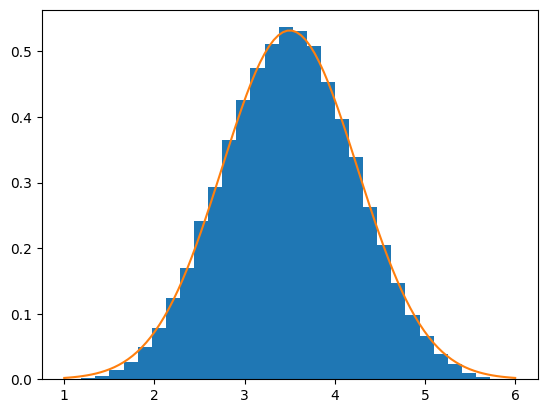

In [ ]:
#Experimentos sobre el Teorema del Límite Central

import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import random

#EJEMPLO: Lanzamiento de un dado de 6 (v.a. discreta con dist. uniforme)

#Parámetros de la población
pop_mean = 3.5
pop_sigma = 1.5

#Parámetros del experimento
sample_size = 4
number_of_samples = 100000
sample_mean_vec = []

#Cálculo de la media de las muestras-------------------- 
for i in range(number_of_samples):
  uniform_sample = np.random.uniform(1,6,sample_size)
  sample_mean_vec.append(np.mean(uniform_sample))
#-------------------------------------------------------



#Creación del histograma
plt.hist(sample_mean_vec,bins=30, density=True)


#Distribución de las medias muestrales según el TLC
sigma = pop_sigma / np.sqrt(sample_size)
x = np.linspace(1, 6, 100)
plt.plot(x, norm.pdf(x, pop_mean, sigma))


plt.show()

### Ejercicio

La persona promedio consume 2 litros de agua cuando se encuentra al aire libre (con una desviación estándar de 0.7 litros). Suponga que usted está organizando un campamento a Monteverde para 49 compañeros de trabajo y usted, y se planea llevar 110 litros de agua. ¿Cuál es la probabilidad de quedarse sin agua?

In [ ]:
import scipy.stats as st
1-st.norm.cdf(2.02)

## Invervalos de confianza para los parámetros de una distribución


Se pueden distinguir principalmente dos tipos de métodos de inferencia estadística, usados respectivamente para:

1. **Estimación puntual** de parámetros poblacionales

2. **Estimación por intervalo** sobre tales parámetros

En módulos anteriores hemos estudiado métodos de inferencia estadística para la estimación del valor de parámetros poblacionales usando **estimadores puntuales** (un único número que es nuestra mejor aproximación del parámetro poblacional de interés). 
En esta sección, también estudiaremos métodos de inferencia estadística para la estimación de parámetros poblacionales, pero usando **intervalos de confianza**. Un intervalo de confianza es un rango de números, el cual con cierto grado de probabilidad o de "confianza", va a contener el valor del parámetro poblacional de interés. La probabilidad de que el intervalo realmente contenga el valor del parámetro poblacional es lo que llamamos **nivel de confianza** y al complemento del nivel de confianza le llamamos **error**. A continuación veremos un ejemplo de aplicación de intervalos de confianza.




### Ejemplo

Imagine que su equipo desarrolló un algoritmo de aprendizaje automático, el cual reportó una precisión media muestral $\overline{x}_a$ para una muestra $A=\left\{ a_{1},a_{2},\ldots,a_{n}\right\} $ de $n$ datos de validación.

Dado que el sistema se utilizará en producción con un nuevo conjunto de datos de validación  $A'$, su equipo necesita estimar qué tan **cercana
está la media muestral** $\overline{x}_{a}$ **de la media de
la población** $\mu$ (la media real de la precisión de su algoritmo).
Esto se puede expresar como la necesidad de estimar un intervalo en el cual sepamos que la media se encontrará con cierto **nivel de confianza** $1-\alpha$:

\begin{equation}
p\left\{ l\leq\mu\leq u\right\} =1-\alpha
\end{equation}

donde $l$ corresponde al límite inferior del intervalo, $u$ corresponde al límite superior del intervalo y $\alpha$ es el error. El intervalo de confianza se puede escribir como un margen de error alrededor de la media muestral $\overline{x} \pm\rho$, o bien como un intervalo $[\overline{x}-\rho,\overline{x}+\rho]$. El intervalo tiene dos propiedades: primero, contiene el parámetro objetivo y segundo, su amplitud será relativamente pequeña.

### Intervalos de confianza para $\mu$, con $\sigma$ conocido
Usando el teorema del límite central, nos interesa encontrar el intervalo en el cual la media poblacional $\mu$ esté contenida
con cierto error, por ejemplo $\alpha=0.05.$ Esto significa que el nivel de confianza será de $1-\alpha=0.95$. En caso de conocer el valor $\sigma$ para la población, se puede calcular el intervalo de confianza usando la siguiente fórmula: 

\begin{equation}
\overline{x}\pm\sigma_{\overline{x}}\, z_{\alpha/2},
\end{equation}

donde $z_{\alpha/2}$ corresponde al valor absoluto del punto en la distribución normal estándar en el que la probabilidad acumulativa es igual a $\alpha/2$.

![](https://drive.google.com/uc?export=view&id=1kRbHAJIgGjJE0ziu4hxlh8SxWglKMvKc)

Dado que conocemos la desviación estándar de la población $\sigma$, podemos sustituir $\sigma_{\overline{x}}=\sigma/\sqrt n$, y obtener:

\begin{equation}
\overline{x}\pm\frac{\sigma\, z_{\alpha/2}}{\sqrt{n}}
\end{equation}

Para el caso específico de $\alpha=0.05$, tendríamos que $z_{0.025}=1.96$ y por lo tanto:

\begin{equation}
\overline{x}\pm\frac{1.96\sigma}{\sqrt{n}}
\end{equation}

Observe entonces como el intervalo de confianza $1-\alpha$ ha sido definido en términos de la desviación estándar de la población $\sigma$ y el tamaño de la muestra $n$. Sin embargo, contar con la información de la desviación estándar de la población es poco usual y no es posible en  la mayoría de casos prácticos. Por esta razón en la siguiente sección veremos como calcular el intervalo de confianza cuando desconocemos $\sigma$.

In [ ]:
import scipy.stats as st
st.norm.ppf(0.025)

-1.9599639845400545